In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import log_loss
import ast

# gets rid of scientific notation
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

# shows all columns 
pd.set_option('display.max_columns', None) 

In [2]:
learning_rate = .0005

In [3]:
## Define activation functions
# softmax activation function
def softmax(x):
    expx = np.exp(x - np.max(x))
    return expx/np.sum(expx, axis=1, keepdims=True)

# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# derivative of sigmoid activation function
def dsigmoid(x):
    return x * (1 - x)

In [4]:
wrong_list = []
def classification_accuracy(targets, predictions):
    global wrong_list
    wrong_list = []
    total = len(predictions)
    correct = 0
    for i in range(total):
        predicted_class = np.argmax(predictions[i])
        if targets[i][predicted_class] == 1:
           correct += 1
        else:
            wrong_list.append([i, np.argmax(targets[i]), predicted_class])
    return correct/total

In [5]:
donordata = pd.read_csv('./data/clean-data.csv', index_col=None)
donordata[['Capacity_Low_Value', 'Home_Value', 'Mail_Solicitable',
       'Monthly_Givers', 'OGP_Prospects', '2FY_Athletics',
       '2FY_Giving', '2FY_Museum', '2FY_Music', '2FY_Music_Patron',
       '2FY_Westmont_Fund', '3FY_Athletics', '3FY_Giving', '3FY_Museum',
       '3FY_Music', '3FY_Music_Patron', '3FY_Westmont_Fund', '4FY_Athletics',
       '4FY_Giving', '4FY_Museum', '4FY_Music', '4FY_Music_Patron',
       '4FY_Westmont_Fund', 'Age', 'Current_Parent', 'Emailable',
       'Email_Opt_Out', 'Email_Solicitable', 'Trustee', 'WES_Member',
       'Westmont_Foundation_Member', 'No_Children', 'No-Need_Parent',
       'Not_Campaign', 'Westmont_Foundation_Account',
       'Board_of_Advisors_Membership', 'Is_Email_Bounced',
       'Account_Strength_for_Today_Donor', 'New_Donor', 'Largest_Gift',
       'FY_Given_in_Past_3_Years', 'Num_Gifts_LFY', 'Num_Gifts_2FY',
       'Num_Gifts_3FY', 'Num_Gifts', 'Balance_Expected_NFY', 'Avg_Gift_Amount',
       'Avg_Gifts_Per_Year', 'Num_Gifts_Past_3_Years', 'Giving_Amt_Past_3_FY',
       'Avg_Gift_Amount_in_Past_3_Years', 'prospect_priority',
       'acct_top_const', 'con_top_const', 'stage', 'married',
       'num_active_comm_groups', 'gender', 'had_contact_report', 'portfolio_1',
       'portfolio_2', 'portfolio_3', 'in_giving_society', 'westmont_grad',
       'Num_Events_RSVP', 'Num_Total_IA', 'Num_Current_IA', 'Num_Total_BC',
       'Num_Current_BC', 'Total_CR', 'Total_Sig_CR', 'Total_CR_in_past_year',
       'Sig_in_past_year', 'In_person_CR']] = preprocessing.scale(donordata[['Capacity_Low_Value', 'Home_Value', 'Mail_Solicitable',
       'Monthly_Givers', 'OGP_Prospects', '2FY_Athletics',
       '2FY_Giving', '2FY_Museum', '2FY_Music', '2FY_Music_Patron',
       '2FY_Westmont_Fund', '3FY_Athletics', '3FY_Giving', '3FY_Museum',
       '3FY_Music', '3FY_Music_Patron', '3FY_Westmont_Fund', '4FY_Athletics',
       '4FY_Giving', '4FY_Museum', '4FY_Music', '4FY_Music_Patron',
       '4FY_Westmont_Fund', 'Age', 'Current_Parent', 'Emailable',
       'Email_Opt_Out', 'Email_Solicitable', 'Trustee', 'WES_Member',
       'Westmont_Foundation_Member', 'No_Children', 'No-Need_Parent',
       'Not_Campaign', 'Westmont_Foundation_Account',
       'Board_of_Advisors_Membership', 'Is_Email_Bounced',
       'Account_Strength_for_Today_Donor', 'New_Donor', 'Largest_Gift',
       'FY_Given_in_Past_3_Years', 'Num_Gifts_LFY', 'Num_Gifts_2FY',
       'Num_Gifts_3FY', 'Num_Gifts', 'Balance_Expected_NFY', 'Avg_Gift_Amount',
       'Avg_Gifts_Per_Year', 'Num_Gifts_Past_3_Years', 'Giving_Amt_Past_3_FY',
       'Avg_Gift_Amount_in_Past_3_Years', 'prospect_priority',
       'acct_top_const', 'con_top_const', 'stage', 'married',
       'num_active_comm_groups', 'gender', 'had_contact_report', 'portfolio_1',
       'portfolio_2', 'portfolio_3', 'in_giving_society', 'westmont_grad',
       'Num_Events_RSVP', 'Num_Total_IA', 'Num_Current_IA', 'Num_Total_BC',
       'Num_Current_BC', 'Total_CR', 'Total_Sig_CR', 'Total_CR_in_past_year',
       'Sig_in_past_year', 'In_person_CR']])


traindata = donordata.sample(frac=.8, random_state=10)
donordata = donordata.drop(traindata.index)
validationdata = donordata.sample(frac=.5, random_state=10)
testdata = donordata.drop(validationdata.index)

train_target_output = traindata.target_output.values
validation_target_output = validationdata.target_output.values
test_target_output = testdata.target_output.values

traindata = traindata.drop(['target_output'], axis=1)
traindata = traindata.set_index(['Contact_ID'], drop=True)
validationdata = validationdata.drop(['target_output'], axis=1)
validationdata = validationdata.set_index(['Contact_ID'], drop=True)
testdata = testdata.drop(['target_output'], axis=1)
testdata = testdata.set_index(['Contact_ID'], drop=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.


In [6]:
# one hot encode the target output for the train data
first = True
for x in train_target_output:
    if first:
        train_one_hot_encoded = np.array([ast.literal_eval(x)])
        first = False
    else:
        train_one_hot_encoded = np.append(train_one_hot_encoded, [ast.literal_eval(x)],axis=0)

In [7]:
# one hot encode the target output for the validation data
first = True
for x in validation_target_output:
    if first:
        validation_one_hot_encoded = np.array([ast.literal_eval(x)])
        first = False
    else:
        validation_one_hot_encoded = np.append(validation_one_hot_encoded, [ast.literal_eval(x)],axis=0)

In [8]:
# one hot encode the target output for the test data
first = True
for x in test_target_output:
    if first:
        test_one_hot_encoded = np.array([ast.literal_eval(x)])
        first = False
    else:
        test_one_hot_encoded = np.append(test_one_hot_encoded, [ast.literal_eval(x)],axis=0)

In [9]:
num_inputs = len(traindata.columns)

# initialize weights
np.random.seed(1)
weights_1 = np.random.randn(num_inputs,40)*np.sqrt(2/num_inputs)
weights_2 = np.random.randn(40,40)*np.sqrt(2/40)
weights_3 = np.random.randn(40,12)*np.sqrt(2/40)

# initialize bias
bias_1 = 1
bias_2 = 1
bias_3 = 1

In [10]:
## takes in the inputs and adjusts the weights accordingly
# If train is false, it makes a prediction and doesn't adjust the weights
def train(batch, target_outputs, train):
    global weights_3
    global weights_2
    global weights_1
    global bias_1
    global bias_2
    global bias_3
    
    ## feedforward
    layer_1_output = sigmoid(np.dot(batch, weights_1) + bias_1)
    layer_2_output = sigmoid(np.dot(layer_1_output, weights_2) + bias_2)
    output = softmax(np.dot(layer_2_output, weights_3) + bias_3)

    if train:
        ## backprop
        # output layer
        dcost_dpred = target_outputs - output
        dz_dw3 = layer_2_output
        
        dcost_dw3 = np.dot(dz_dw3.T, dcost_dpred)
        dcost_b3 = dcost_dpred
        
        # layer 2
        dcost_doutput2 = np.dot(dcost_dpred, weights_3.T)
        doutput2_dz = dsigmoid(layer_2_output)
        dz_dw2 = layer_1_output
        
        dcost_dw2 = np.dot(dz_dw2.T, dcost_doutput2 * doutput2_dz)
        dcost_b2 = dcost_doutput2 * doutput2_dz

        # layer 1
        dcost_doutput1 = np.dot(dcost_doutput2 * doutput2_dz, weights_2.T)
        doutput1_dz = dsigmoid(layer_1_output)
        dz_dw1 = batch
        
        dcost_dw1 = np.dot(dz_dw1.T, dcost_doutput1 * doutput1_dz)
        dcost_b1 = dcost_doutput1 * doutput1_dz
        
        # update weights
        weights_3 += dcost_dw3 * learning_rate
        weights_2 += dcost_dw2 * learning_rate
        weights_1 += dcost_dw1 * learning_rate

        # update biases
        bias_3 += np.average(dcost_b3) * learning_rate
        bias_2 += np.average(dcost_b2) * learning_rate 
        bias_1 += np.average(dcost_b1) * learning_rate 
        
    return output

In [11]:
error_list = []
index = []
validation_data = validationdata.values
train_data = traindata.values
for i in range(1501):
    train_output = train(train_data, train_one_hot_encoded, True)
    error = log_loss(train_one_hot_encoded, train_output)
    error_list.append(error)
    index.append(i)
    if (i % 100) == 0:
        validation_output = train(validation_data, validation_one_hot_encoded, False)
        accuracy = classification_accuracy(validation_one_hot_encoded, validation_output)
        print(accuracy)
    if (i % 250) == 0:
         learning_rate *= .9

0.9303196803196803
0.9303196803196803
0.9303196803196803
0.8943556443556444
0.9090909090909091
0.9303196803196803
0.9303196803196803
0.9303196803196803
0.9128371628371629
0.9143356643356644
0.9303196803196803
0.9303196803196803
0.9303196803196803
0.9303196803196803
0.9303196803196803
0.9328171828171828


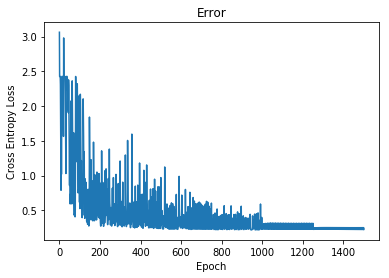

In [12]:
# plot error vs. epoch
plt.plot(index, error_list)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Error')
plt.show()

In [13]:
# Training classification accuracy
classification_accuracy(train_one_hot_encoded, train_output)

0.9365361803084223

In [14]:
# Validation classification accuracy
validation_output = train(validation_data, validation_one_hot_encoded, False)
classification_accuracy(validation_one_hot_encoded, validation_output)

0.9328171828171828

In [15]:
# Test classification accuracy
test_data = testdata.values
test_output = train(test_data, test_one_hot_encoded, False)
classification_accuracy(test_one_hot_encoded, test_output)

0.938061938061938